# Akt√≠v tanul√°s

A f√©lkar√∫ rabl√≥ mint√°j√°ra legyen adott $K$-kar√∫ j√°t√©kg√©p, ahol, ha szerencs√©nk van, egy kart megh√∫zva valamekkora jutalomban (*reward*) r√©szes√ºlhet√ºnk. Az egyes karok √°ltal adott jutalmak val√≥sz√≠n≈±s√©gi v√°ltoz√≥k, amelyek ismeretlen, egym√°st√≥l f√ºggetlen eloszl√°sokat k√∂vetnek. A c√©lunk, hogy a karok egym√°s ut√°n t√∂rt√©n≈ë h√∫zogat√°s√°val
- Felfedezz√ºk a probl√©materet, azaz megbecs√ºlj√ºk az egyes karok "j√≥s√°g√°t" (*exploration*),
- Ezt a tud√°st kihaszn√°lva maximaliz√°ljuk az √∂sszes jutalmunkat (*exploitation*).

√ârezz√ºk, hogy a k√©t c√©l egym√°snak ellentmond: a felfedez√©shez szuboptim√°lis karokat is meg kell h√∫znunk, ezzel azonban az √∂sszes jutalmunkat cs√∂kkentj√ºk. A karok val√≥sz√≠n≈±s√©gi term√©szete miatt az is el≈ëfordulhat, hogy egy-egy "j√≥" kar √©ppen rossz jutalmat ad, √≠gy √©rdemes lehet a pillanatnyilag rossznak gondolt karokat is t√∂bbsz√∂r tesztelni. Ez az *exploration vs. exploitation* dilemma.

B√°r az √°ltalunk vizsg√°lt strat√©gi√°k t√∂bbf√©le eloszl√°s eset√©ben is m≈±k√∂dnek, mi a m√°r j√≥l ismert Bernoulli-eloszl√°st fogjuk haszn√°lni. Azaz minden karhoz tartozik egy ismeretlen $\theta_k$ param√©ter, amely annak val√≥sz√≠n≈±s√©g√©t jel√∂li, hogy a kart√≥l kapunk $1$ egys√©g jutalmat. Egy h√∫z√°s √≠gy egy Bernoulli-k√≠s√©rletnek felel meg:

\begin{align}
p\left(y \mid \theta_k \right) = \mathcal{B}ern \left(y \mid \theta_k \right) = \theta_k^{y} (1-\theta_k)^{1-y},
\end{align}

ahol $y \in \left\lbrace 0,1 \right\rbrace$ a $k$. kar megh√∫z√°sa ut√°n kapott jutalom. A tov√°bbiakban jel√∂lje $\bar y_k$ a $k.$ kar √°ltal adott jutalmak √°tlag√°t, $n_k$ azt, hogy h√°nyszor h√∫ztuk meg a $k$. kart, $n$ pedig az √∂sszes h√∫z√°sok sz√°m√°t eg√©szen mostan√°ig.

## Strat√©gi√°k

A k√∂vetkez≈ë strat√©gi√°kat fogjuk implement√°lni (p√°rat l√°ttuk el≈ëad√°son):

- $\varepsilon$-greedy: adott $\varepsilon$ val√≥sz√≠n≈±s√©ggel felfedez√ºnk, azaz v√©letlenszer≈±en v√°laszott kart h√∫zunk meg; k√ºl√∂nben azt, amelyik eddig √°tlagosan a legnagyobb jutalmat adta (azaz $\bar y_k$ maxim√°lis).
- UCB1: el≈ësz√∂r minden kart megh√∫zunk egyszer, majd mindig azt h√∫zzuk, amelyik a $\bar y_k + \sqrt{\frac{2 \ln n}{n_k}}$ mennyis√©get maximaliz√°lja.
- UCB-$\alpha$: hasonl√≥an az el≈ëbbihez, de $\bar y_k + \sqrt{\frac{\alpha \ln n}{n_k}}$-t haszn√°lunk.
- Thompson-mintav√©tel: minden karra feltesz√ºnk egy $\beta$ prior eloszl√°st, majd mint√°t vesz√ºnk √©s a maxim√°lisat v√°lasztjuk; a jutalom ismeret√©ben a $\beta$-eloszl√°s friss√≠t√©se a m√°r ismert m√≥don t√∂rt√©nik (konjug√°lt eloszl√°sok).
- Bayesi UCB: hasonl√≥k√©ppen fenntartunk egy $\beta$-eloszl√°st, de a v√°laszt√°sn√°l nem mint√°t vesz√ºnk, hanem $1- \frac{1}{1+n}$ percentilist vesz√ºnk alapul (pl. a `beta.ppf()` f√ºggv√©nnyel).

## Feladatok

**1. feladat.** Val√≥s√≠tsa meg az √°genseket a lenti protot√≠pus alapj√°n! Az √°genseknek a `get_arm()` √©s az `update()` f√ºggv√©nyeket k√∂telez≈ë implement√°lniuk.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import beta

In [ ]:
# Protot√≠pus √°gens (p√©lda)
class Agent:
  def __init__(self,K):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart h√∫ztuk
    self.K = K  # karok sz√°ma

  # K√∂telez≈ë: melyik legyen a k√∂vetkez≈ë kar
  def get_arm(self):
    self.arm = np.random.choice(self.K)
    return self.arm

  # K√∂telez≈ë: az √°gens √°llapot√°nak friss√≠t√©se
  def update(self,reward):
    self.A += [self.arm]
    self.X += [reward]

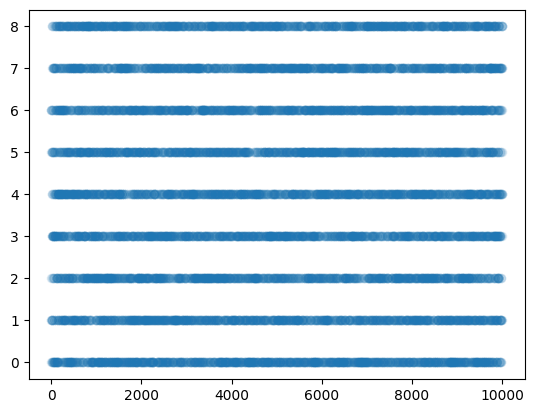

In [ ]:
# 2. feladat megold√°sa
agent = Agent(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

A ki√©rt√©kel√©shez a k√∂vetkez≈ë esetet fogjuk haszn√°lni:

In [ ]:
rewards = [0.01, 0.02, 0.3, 0.4, 0.5, 0.6, 0.795, 0.8, 0.805]

Itt pedig a szimul√°ci√≥hoz haszn√°lhat√≥ k√≥d l√°that√≥:

In [ ]:
# Szimul√°ci√≥ T db h√∫z√°ssal
def simulate(rewards,agent,T=10000):
  for t in range(T):
    arm    = agent.get_arm()
    reward = (np.random.rand()<rewards[arm])*1
    agent.update(reward)

In [ ]:
# 1. feladat megold√°sa
class Egreedy:
  def __init__(self,K,e=0.01):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart h√∫ztuk
    self.K = K  # karok sz√°ma

    self.x = np.zeros(K) # nyilvantartjuk
    self.n = np.ones(K)
    self.e = e

  # K√∂telez≈ë: melyik legyen a k√∂vetkez≈ë kar
  def get_arm(self):
    if np.random.rand() < self.e:
      self.arm = np.random.choice(self.K)
    else:
      self.arm = np.argmax(self.x / self.n)
    return self.arm

  # K√∂telez≈ë: az √°gens √°llapot√°nak friss√≠t√©se
  def update(self,reward):
    self.A += [self.arm]
    self.X += [reward]
    self.x[self.arm] += reward
    self.n[self.arm] += 1


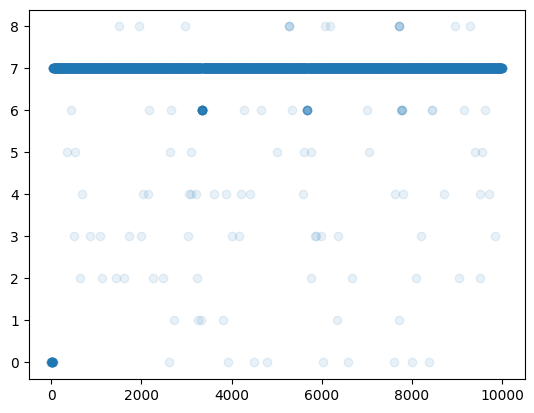

In [ ]:
# 2. feladat megold√°sa
agent = Egreedy(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

In [ ]:
# 1. feladat megold√°sa UCB
class UCB1:
  def __init__(self,K):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart h√∫ztuk
    self.K = K  # karok sz√°ma

    self.x = np.zeros(K) # nyilvantartjuk
    self.n = np.zeros(K)

  # K√∂telez≈ë: melyik legyen a k√∂vetkez≈ë kar
  def get_arm(self):
    m = np.sum(self.n)
    if m < self.K:
      self.arm = int(m)
    else:
      self.arm = np.argmax(self.x / self.n + np.sqrt(2*np.log(m)/self.n))
    return self.arm

  # K√∂telez≈ë: az √°gens √°llapot√°nak friss√≠t√©se
  def update(self,reward):
    self.A += [self.arm]
    self.X += [reward]
    self.x[self.arm] += reward
    self.n[self.arm] += 1


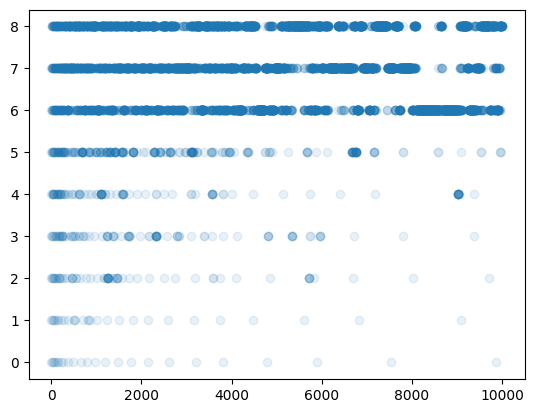

In [ ]:
# 2. feladat megold√°sa
agent = UCB1(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

In [ ]:
# 1. feladat megold√°sa UCB-ùõº
class UCBA:
  def __init__(self,K,alpha):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart h√∫ztuk
    self.K = K  # karok sz√°ma
    self.alpha = alpha
    self.x = np.zeros(K) # nyilvantartjuk
    self.n = np.zeros(K)

  # K√∂telez≈ë: melyik legyen a k√∂vetkez≈ë kar
  def get_arm(self):
    m = np.sum(self.n)
    if m < self.K:
      self.arm = int(m)
    else:
      self.arm = np.argmax(self.x / self.n + np.sqrt(self.alpha*np.log(m)/self.n))
    return self.arm

  # K√∂telez≈ë: az √°gens √°llapot√°nak friss√≠t√©se
  def update(self,reward):
    self.A += [self.arm]
    self.X += [reward]
    self.x[self.arm] += reward
    self.n[self.arm] += 1

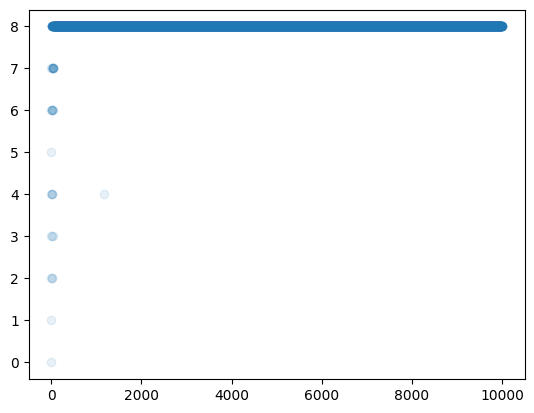

In [ ]:
# 2. feladat megold√°sa
agent = UCBA(len(rewards),0.05)
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

In [ ]:
# 1. feladat megold√°sa Thompson
class Thompson:
  def __init__(self,K):
    self.X = [] # eddigi jutalmak
    self.A = [] # melyik kart h√∫ztuk
    self.K = K  # karok sz√°ma
    self.a = np.ones(K) # Bernoulli alfa
    self.b = np.ones(K) # Bernoulli b√©ta ha mindkett≈ë egy, akkor nincs kezdeti felt√©telez√©s√ºnk


  # K√∂telez≈ë: melyik legyen a k√∂vetkez≈ë kar
  def get_arm(self):
    self.arm = np.argmax(np.random.beta(self.a, self.b))
    return self.arm

  # K√∂telez≈ë: az √°gens √°llapot√°nak friss√≠t√©se
  def update(self,reward):
    self.A += [self.arm]
    self.X += [reward]
    self.a[self.arm] += reward
    self.b[self.arm] += 1-reward

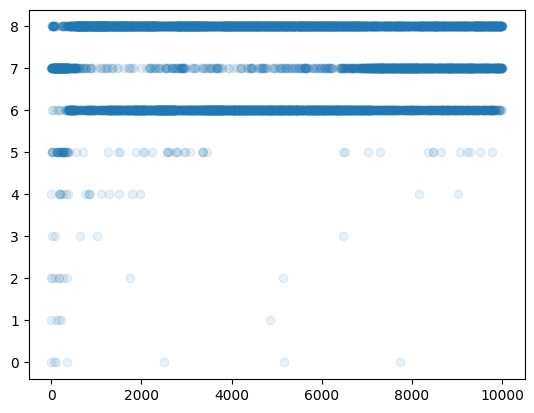

In [ ]:
# 2. feladat megold√°sa
agent = Thompson(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

√úgyeljen r√°, hogy az eredm√©nyek az egyes fut√°sokn√°l elt√©rhetnek, √≠gy c√©lszer≈± t√∂bbsz√∂r is lefuttatni a m√©r√©seket. K√ºl√∂n√∂sen az $\varepsilon$-greedy strat√©gia mutat nagy variabilit√°st.

**2. feladat.** V√©gezze el a szimul√°ci√≥t mindegyik √°genssel, majd minden √°genshez √°br√°zolja scatter plot-on, mikor melyik kart h√∫zta meg (v√≠zszintes tengely: h√∫z√°s sorsz√°ma, f√ºgg≈ëleges tengely: megh√∫zott kar)! Figyelje meg az √°gensek felfedez≈ë tev√©kenys√©g√©t.


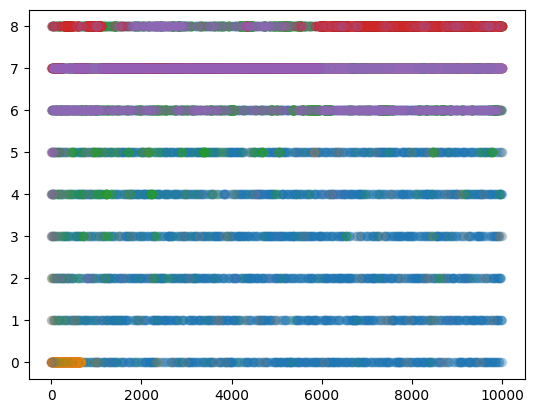

In [ ]:
# 2. feladat megold√°sa
agent = Agent(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

# 2. feladat megold√°sa Egreedy
agent = Egreedy(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

# 2. feladat megold√°sa UCB1
agent = UCB1(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

# 2. feladat megold√°sa UCBA
agent = UCBA(len(rewards),0.05)
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

# 2. feladat megold√°sa Thomson

agent = Thompson(len(rewards))
simulate(rewards,agent)

plt.scatter(range(len(agent.A)), agent.A,alpha=0.1)

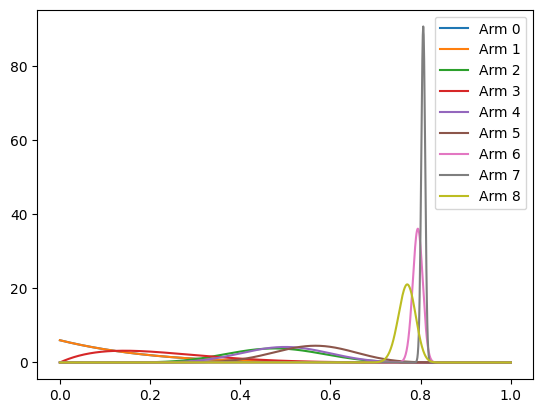

In [ ]:
x = np.linspace(0,1,1000)
for i in range(len(rewards)):
  p = beta.pdf(x,agent.a[i],agent.b[i])
  plt.plot(x,p,label=f"Arm {i}")
plt.legend()

Egy strat√©gia fontos jellemz≈ëje a megb√°n√°s (*regret*), ami a mi eset√ºnkben a k√∂vetkez≈ëk√©ppen defini√°lhat√≥:

\begin{align}
\sum_{k=1}^K n_k \left(\theta^* - \theta_k \right),
\end{align}

ahol $\theta^*$ a legjobb kar jutalm√°nak v√°rhat√≥ √©rt√©ke, $\theta_k$ pedig a $k$. kar√© (ami most, Bernoulli-eloszl√°sr√≥l l√©v√©n sz√≥, megegyezik a param√©terrel). Azaz itt val√≥j√°ban azt m√©rj√ºk, hogy v√°rhat√≥an mennyit vesz√≠t√ºnk amiatt, hogy a strat√©gi√°nk nem mindig a legjobb kart v√°lasztja.

**3. feladat.** √ârt√©kelje ki az √°gensek teljes√≠tm√©ny√©t! A k√∂vetkez≈ëket vegye alapul:

- √Åtlagos jutalom
- A legjobb kar megh√∫z√°s√°nak relat√≠v frekvenci√°ja
- Regret

Az eredm√©nyeket az id≈ë (h√∫z√°sok) f√ºggv√©ny√©ben is √°br√°zolja! (Azaz: x tengelyen a h√∫z√°s sorsz√°ma, az y tengelyen pedik az √©ppen aktu√°lis √°tlagjutalom/frekvencia/regret.)

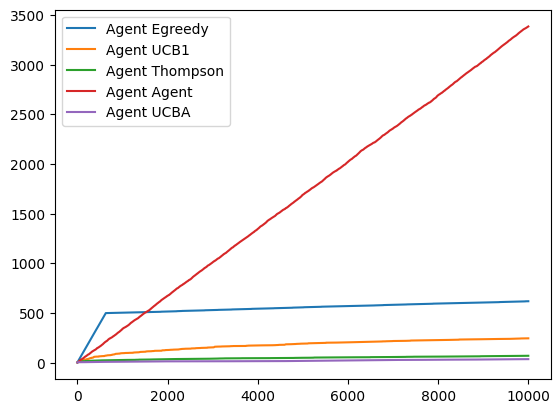

In [ ]:
# 3. feladat megold√°sa


agents = [Egreedy(len(rewards)), UCB1(len(rewards)), Thompson(len(rewards)), Agent(len(rewards)), UCBA(len(rewards),0.05)]
names = ['Egreedy', 'UCB1', 'Thompson', 'Agent', 'UCBA']
nm = 0
for a in agents:
  simulate(rewards, a)
  regret = np.cumsum(np.max(rewards) - np.array(rewards)[a.A])
  plt.plot(range(len(regret)),regret, label=f"Agent {names[nm]}")
  nm = nm + 1
plt.legend()

**4. feladat.** Tetsz≈ëleges probl√©m√°ban √°br√°zolja a bayesi UCB √°gens $\beta$-posteriorjait a tan√≠t√°s legv√©g√©n!

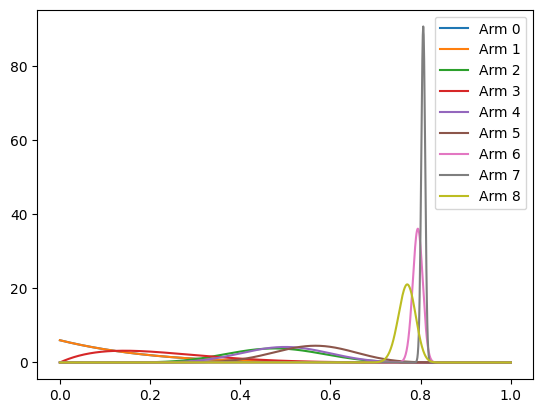

In [ ]:
# 4. feladat megold√°sa
x = np.linspace(0,1,1000)
for i in range(len(rewards)):
  p = beta.pdf(x,agent.a[i],agent.b[i])
  plt.plot(x,p,label=f"Arm {i}")
plt.legend()